In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

In [96]:
df_original = pd.read_csv('../clean_dataset.csv', sep=',', header=0)
df = pd.DataFrame(data=df_original)
sns.set(style="ticks", color_codes=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39050 entries, 0 to 39049
Data columns (total 43 columns):
Unnamed: 0                      39050 non-null int64
Unnamed: 0.1                    39050 non-null int64
n_tokens_title                  39050 non-null float64
n_tokens_content                39050 non-null float64
n_unique_tokens                 39050 non-null float64
n_non_stop_unique_tokens        39050 non-null float64
num_hrefs                       39050 non-null float64
num_self_hrefs                  39050 non-null float64
num_imgs                        39050 non-null float64
average_token_length            39050 non-null float64
num_keywords                    39050 non-null float64
kw_max_min                      39050 non-null float64
kw_avg_min                      39050 non-null float64
kw_min_max                      39050 non-null float64
kw_avg_max                      39050 non-null float64
kw_min_avg                      39050 non-null float64
kw_max_avg     

In [127]:
# features = df[[c for c in df if (c != "shares") and (c != 'Unnamed: 0') and (c != 'Unnamed: 0.1')]]
features = df[[c for c in df if (c == 'kw_avg_avg') or (c == 'LDA_03') or (c == 'kw_max_avg')]]
target = df["shares"]

#features = list(zip(df['kw_avg_avg'], df['LDA_03'], df['kw_max_avg'], df['self_reference_avg_sharess'], df['self_reference_min_shares'], df['self_reference_max_shares']))
#target = np.array(df['shares'])

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=12)

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39050 entries, 0 to 39049
Data columns (total 3 columns):
kw_max_avg    39050 non-null float64
kw_avg_avg    39050 non-null float64
LDA_03        39050 non-null float64
dtypes: float64(3)
memory usage: 915.3 KB


In [145]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

knn = KNeighborsRegressor(n_neighbors=50, weights="uniform", algorithm='auto')
model = knn.fit(X_train, Y_train)
score = knn.score(X_train, Y_train)

predicted = model.predict(X_test)

print(mean_squared_error(Y_test, predicted))
print(mean_absolute_error(Y_test, predicted))
print(explained_variance_score(Y_test, predicted))
print(r2_score(Y_test, predicted))
print(score)

10537611.345378404
1916.6365309432354
0.03575426496152123
0.03563804314672314
0.06424610959279753


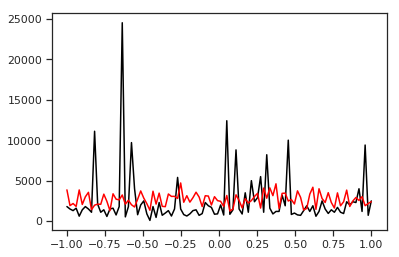

In [146]:
plt.plot(np.linspace(-1, 1, 100), Y_test[:100], label='data', color='black')
plt.plot(np.linspace(-1, 1, 100), predicted[:100], label='predicted', color='red')